In [75]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import pylab
import statsmodels.api as sm 
import statsmodels.stats.multicomp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from random import choice
from pylab import legend,plot,show,title,xlabel,ylabel
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm, t
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from collections import Counter
from numpy import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf 
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os 

In [7]:
os.getcwd()

'D:\\PG-DBDA_R_Studio\\Linear Regression Case Study'

In [5]:
os.chdir(r'D:/PG-DBDA_R_Studio/Linear Regression Case Study')

In [10]:
df = pd.read_csv("day.csv") 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(730, 16)

In [13]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are 16 columns and 730 rows in the dataset.
Some columns are categorical in nature (like mnth, season, weekday and weathersit), however, their datatype is int64 which 
needs to be handled later during the data cleaning process.
There are definitely some columns (like instant, dteday, casual, registered) that can be dropped as they are 
irrelevant/redundant to our analysis and model building.

In [15]:
df1 = df.drop(['casual','registered','instant','dteday','atemp','cnt'],axis=1)

In [16]:
df = df.drop(['casual','registered','instant','dteday','atemp'],axis=1)

Eliminated casual and registered as out focus is on total bike count.

Dropped instant due to redundancy as it contains indexing numbers.

Dropped dteday since month and year provide sufficient data

We Dropped count because count is the response variable and it influence all the columns so for checking VIF.

In [17]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
print(vif)

     Features        VIF
0      season  21.189179
1          yr   1.945111
2        mnth  15.247968
3     holiday   1.100474
4     weekday   3.123374
5  workingday   3.384889
6  weathersit  13.118082
7        temp   9.416122
8         hum  27.194816
9   windspeed   5.302561


In [18]:
x = df.drop('cnt',axis=1) 
y = df.cnt

In [19]:
info_gains = mutual_info_classif(x,y)
ig_vals = np.array(info_gains)
print(ig_vals)

[0.21332623 0.8437465  0.         0.30926604 0.34487327 0.64770687
 1.03062824 0.09252131 0.         0.17667412]


In [20]:
col_names = np.array(x.columns)
ind = np.flip(np.argsort(ig_vals))
print("Sorted:",ind)
ig_vals = ig_vals[ind]
col_names = col_names[ind]
print(ig_vals)
print("Column Names",col_names)

Sorted: [6 1 5 4 3 0 9 7 8 2]
[1.03062824 0.8437465  0.64770687 0.34487327 0.30926604 0.21332623
 0.17667412 0.09252131 0.         0.        ]
Column Names ['weathersit' 'yr' 'workingday' 'weekday' 'holiday' 'season' 'windspeed'
 'temp' 'hum' 'mnth']


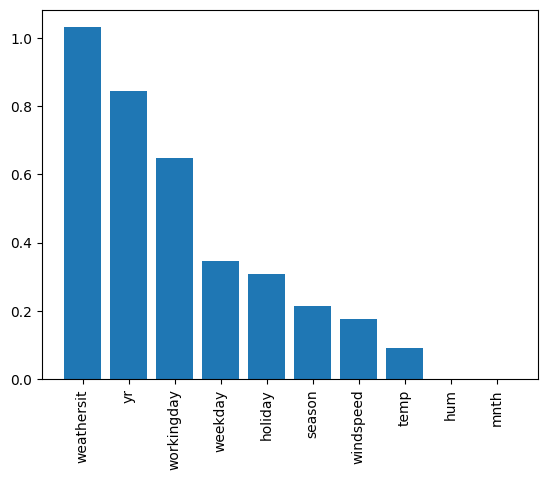

In [21]:
plt.bar(col_names,ig_vals)
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [23]:
df['weathersit'].value_counts(ascending=False)

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

1.  Clear, Few clouds, Partly cloudy, Partly cloudy are mapped as Good
2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist are mapped as Moderate
3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds are mapped as Bad


In [24]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,-0.017230,-0.002453,0.039769,-0.158186,-0.248506,1.000000,-0.235132


<Axes: >

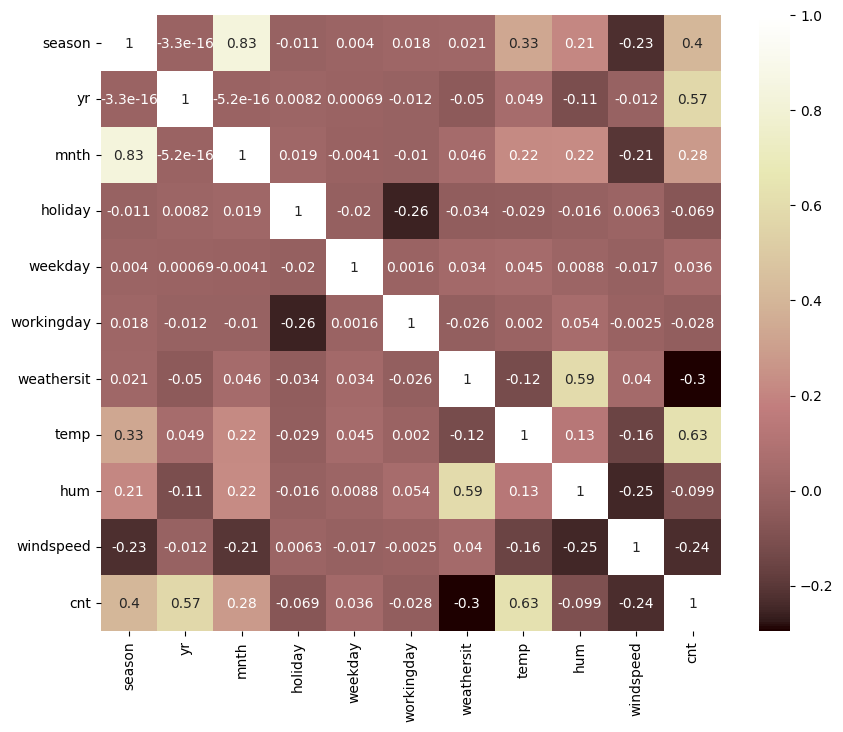

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='pink')

The correlation of temp and year are more closely correlated with cnt which is our response variable.

The correlation of windspeed and humidity is very less with cnt which is our response variable so we can eliminate these columns.

# Checking Categorical Data with boxplots

C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\783734990.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.cnt,x=df.season,palette='vlag')
C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\783734990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.cnt,x=df.weathersit,palette='vlag')
C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\783734990.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.cnt,x=df.yr,palette='vlag')


<Axes: xlabel='yr', ylabel='cnt'>

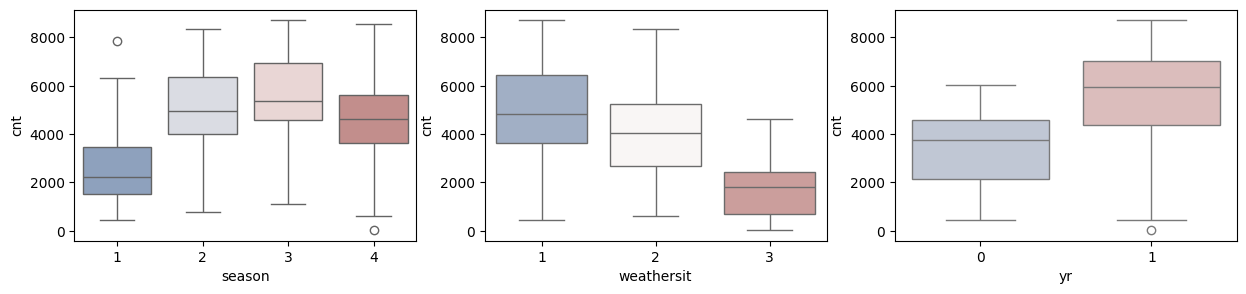

In [26]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.boxplot(y=df.cnt,x=df.season,palette='vlag')

plt.subplot(1,3,2)
sns.boxplot(y=df.cnt,x=df.weathersit,palette='vlag')

plt.subplot(1,3,3)
sns.boxplot(y=df.cnt,x=df.yr,palette='vlag')

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)

- Season vs. Count (cnt):

The cnt (bike rental count) varies by season.
Spring (1): Lowest median bike rental count. This could be attributed to less favorable weather conditions or transitional periods.

Summer (2) and Fall (3): Higher median bike rental counts, indicating these seasons are more popular for bike rentals, possibly due to favorable weather and outdoor activities.

Winter (4): Slightly lower rentals than summer and fall but still significant. This suggests biking is fairly consistent even in colder weather.

- Weathersit vs. Count (cnt):

Weather significantly impacts bike rentals.

Clear/Partly Cloudy (1): Highest median rentals, showing that clear weather promotes biking.

Mist/Cloudy (2): Moderate bike rentals, indicating weather conditions are less ideal but not entirely deterrent.

Adverse Weather (3): Lowest rentals, which is expected as light snow, rain, or thunderstorms are not conducive to biking.

- Year (yr) vs. Count (cnt):

Bike rentals increased significantly from 2018 (yr = 0) to 2019 (yr = 1).

- Seasonality:

Bike rental services could target marketing campaigns during the summer and fall seasons to maximize usage.
Spring could be a focus for promotions or discounts to encourage rentals during this period.

- Weather Conditions:

Rental services could consider flexible pricing or incentivized policies during adverse weather (e.g., light snow or rain) to boost usage.
Clear weather days should be leveraged with increased availability of bikes.

- Yearly Growth:

The significant increase in rentals from 2018 to 2019 suggests that efforts to grow the service have been successful. Continuous monitoring of trends could help identify further growth opportunities.

# Season -> Anova Test to check whether that column has any effects on response cnt

In [27]:
mod1 = ols('cnt ~ season' ,data=df).fit()

In [28]:
tb1 = sm.stats.anova_lm(mod1)

In [29]:
print(tb1)

             df        sum_sq       mean_sq           F        PR(>F)
season      1.0  4.472604e+08  4.472604e+08  142.488566  4.006755e-30
Residual  728.0  2.285135e+09  3.138921e+06         NaN           NaN


Since the pvalue < 0.05 The column season significantly influences the response column cnt.

# Yr -> Anova Test to check whether that column has any effects on response cnt

In [30]:
mod1 = ols('cnt ~ yr' ,data=df).fit()

In [31]:
tb1 = sm.stats.anova_lm(mod1)

In [32]:
print(tb1)

             df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.869095e+08  8.869095e+08  349.864652  4.745374e-64
Residual  728.0  1.845485e+09  2.535007e+06         NaN           NaN


Since the pvalue < 0.05 The column yr significantly influences the response column cnt.But since this column has only two values in years 0:2018,1:2019 so we can ignore this column.

 # Weathersit -> Anova Test to check whether that column has any effects on response cnt

In [33]:
mod1 = ols('cnt ~ weathersit' ,data=df).fit()

In [34]:
tb1 = sm.stats.anova_lm(mod1)

In [35]:
print(tb1)

               df        sum_sq       mean_sq          F        PR(>F)
weathersit    1.0  2.392861e+08  2.392861e+08  69.872704  3.202838e-16
Residual    728.0  2.493109e+09  3.424600e+06        NaN           NaN


Since the pvalue < 0.05 The column weathersit significantly influences the response column cnt.

C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\3504765458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df.cnt,x=df.weekday,palette='pink')


<Axes: xlabel='weekday', ylabel='cnt'>

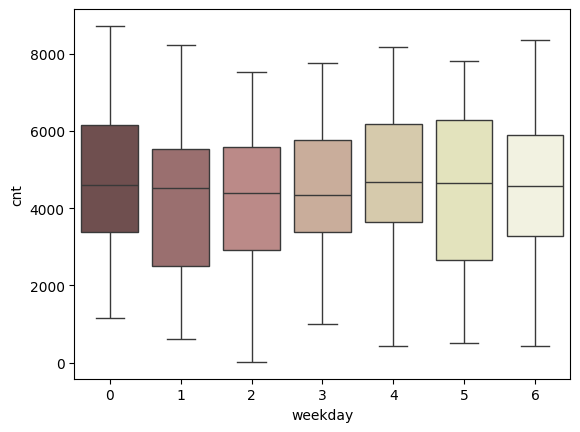

In [36]:
sns.boxplot(y=df.cnt,x=df.weekday,palette='pink')

# Weekday -> Anova Test to check whether that column has any effects on response cnt

In [37]:
mod1 = ols('cnt ~ weekday' ,data=df).fit()

In [38]:
tb1 = sm.stats.anova_lm(mod1)

In [39]:
print(tb1)

             df        sum_sq       mean_sq         F    PR(>F)
weekday     1.0  3.577193e+06  3.577193e+06  0.954331  0.328944
Residual  728.0  2.728818e+09  3.748376e+06       NaN       NaN


Since the pvalue > 0.05 The column weekday does not significantly influences the response column cnt.

# Workingday -> Anova Test to check whether that column has any effects on response cnt

In [40]:
mod1 = ols('cnt ~ workingday' ,data=df).fit()

In [41]:
tb1 = sm.stats.anova_lm(mod1)

In [42]:
print(tb1)

               df        sum_sq       mean_sq        F    PR(>F)
workingday    1.0  2.087448e+06  2.087448e+06  0.55659  0.455878
Residual    728.0  2.730307e+09  3.750422e+06      NaN       NaN


Since the pvalue > 0.05 The column workingday does not significantly influences the response column cnt.

In [43]:
df.columns 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\1562325378.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df.cnt,x=df.temp,palette='vlag')
C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\1562325378.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df.cnt,x=df.windspeed,palette='vlag')
C:\Users\shiro\AppData\Local\Temp\ipykernel_17884\1562325378.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=df.cnt,x=df.hum,palette='vlag')


<Axes: xlabel='hum', ylabel='cnt'>

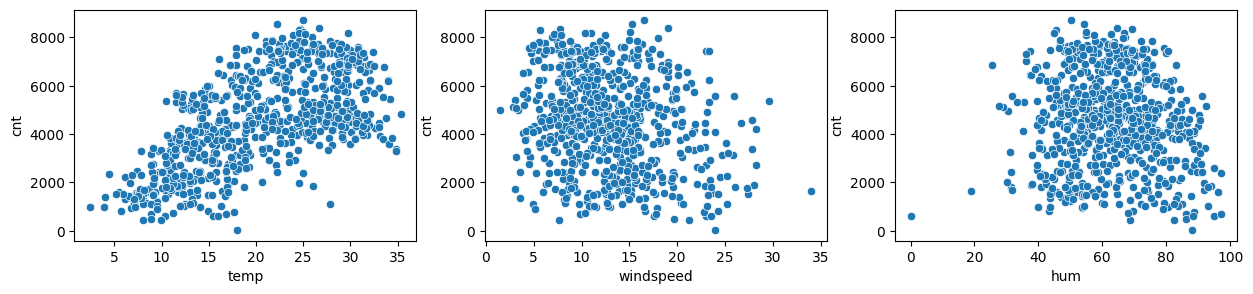

In [44]:
plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
sns.scatterplot(y=df.cnt,x=df.temp,palette='vlag')

plt.subplot(1,3,2)
sns.scatterplot(y=df.cnt,x=df.windspeed,palette='vlag')

plt.subplot(1,3,3)
sns.scatterplot(y=df.cnt,x=df.hum,palette='vlag')

- Temperature (temp) vs. Count (cnt):
A clear positive correlation is observed between temperature and bike rental count.

- Windspeed vs. Count (cnt):
The relationship between windspeed and bike rentals appears scattered, with no strong correlation.
This suggests that windspeed alone does not have a significant impact on bike rentals unless it becomes extreme.

- Humidity (hum) vs. Count (cnt):
 Humidity shows a weak negative correlation with bike rentals.

# So in conclusion the important attributes are season,weathersit,temp,cnt,yr

Applying model on these attributes taking cnt as response and other attributes as predictors

In [45]:
df = df[['season','yr','weathersit','cnt','temp']]

In [46]:
df

,season,yr,weathersit,cnt,temp
0,1,0,2,985,14.110847
1,1,0,2,801,14.902598
2,1,0,1,1349,8.050924
3,1,0,1,1562,8.200000
4,1,0,1,1600,9.305237
...,...,...,...,...,...
725,1,1,2,2114,10.420847
726,1,1,2,3095,10.386653
727,1,1,2,1341,10.386653
728,1,1,1,1796,10.489153


# Linear Regression on Temp

In [47]:
scipy.stats.pearsonr(df.temp,df.cnt)  

PearsonRResult(statistic=0.6270440344135155, pvalue=5.072390953478189e-81)

Since pval < 0.05 so the null hypothesis is rejected.So the effect of Temp on cnt is statistically significant. 

In [48]:
np.corrcoef(df['temp'],df['cnt']) 

array([[1.        , 0.62704403],
       [0.62704403, 1.        ]])

Since the correlation coefficient is 0.6 which indicates that it is related with count 

In [49]:
x_train,x_test,y_train,y_test = train_test_split(df.temp,df.cnt,test_size=0.2,random_state=20)

In [50]:
x_train = sm.add_constant(x_train,prepend=False) # y = mx+c to consider c const column in the model
mod1 = sm.OLS(y_train,x_train).fit()  #ordinary least squared
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     359.6
Date:                Fri, 27 Dec 2024   Prob (F-statistic):           8.48e-63
Time:                        10:49:50   Log-Likelihood:                -5109.0
No. Observations:                 584   AIC:                         1.022e+04
Df Residuals:                     582   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp         159.8047      8.427     18.962      0.0

Creating Dummies for every category 

In [51]:
df.columns

Index(['season', 'yr', 'weathersit', 'cnt', 'temp'], dtype='object')

In [52]:
ses_dum = pd.get_dummies(df.season , drop_first=True , prefix='season').astype(int)
df = df.drop('season' , axis=1)
df = pd.concat([df,ses_dum],axis=1)
df

,yr,weathersit,cnt,temp,season_2,season_3,season_4
0,0,2,985,14.110847,0,0,0
1,0,2,801,14.902598,0,0,0
2,0,1,1349,8.050924,0,0,0
3,0,1,1562,8.200000,0,0,0
4,0,1,1600,9.305237,0,0,0
...,...,...,...,...,...,...,...
725,1,2,2114,10.420847,0,0,0
726,1,2,3095,10.386653,0,0,0
727,1,2,1341,10.386653,0,0,0
728,1,1,1796,10.489153,0,0,0


In [53]:
wet_dum = pd.get_dummies(df.weathersit , drop_first=True , prefix='weathersit').astype(int)
df = df.drop('weathersit' , axis=1)
df = pd.concat([df,wet_dum],axis=1)
df

,yr,cnt,temp,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,985,14.110847,0,0,0,1,0
1,0,801,14.902598,0,0,0,1,0
2,0,1349,8.050924,0,0,0,0,0
3,0,1562,8.200000,0,0,0,0,0
4,0,1600,9.305237,0,0,0,0,0
...,...,...,...,...,...,...,...,...
725,1,2114,10.420847,0,0,0,1,0
726,1,3095,10.386653,0,0,0,1,0
727,1,1341,10.386653,0,0,0,1,0
728,1,1796,10.489153,0,0,0,0,0


In [54]:
yr_dum = pd.get_dummies(df.yr , drop_first=True , prefix='yr').astype(int)
df = df.drop('yr' , axis=1)
df = pd.concat([df,yr_dum],axis=1)
df

,cnt,temp,season_2,season_3,season_4,weathersit_2,weathersit_3,yr_1
0,985,14.110847,0,0,0,1,0,0
1,801,14.902598,0,0,0,1,0,0
2,1349,8.050924,0,0,0,0,0,0
3,1562,8.200000,0,0,0,0,0,0
4,1600,9.305237,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
725,2114,10.420847,0,0,0,1,0,1
726,3095,10.386653,0,0,0,1,0,1
727,1341,10.386653,0,0,0,1,0,1
728,1796,10.489153,0,0,0,0,0,1


In [55]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('cnt',axis=1),df.cnt,test_size=0.2,random_state=20)
x_train=sm.add_constant(x_train,prepend=False)
df_train = pd.concat([x_train,y_train],axis=1)
mod1 = psn.from_formula('cnt ~ temp+season_2+season_3+season_4+weathersit_2+weathersit_3+yr_1',data=df_train).fit()  
print(mod1.summary())

Optimization terminated successfully.
         Current function value: 104.026762
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                    cnt   No. Observations:                  584
Model:                        Poisson   Df Residuals:                      576
Method:                           MLE   Df Model:                            7
Date:                Fri, 27 Dec 2024   Pseudo R-squ.:                  0.7757
Time:                        10:49:50   Log-Likelihood:                -60752.
converged:                       True   LL-Null:                   -2.7081e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.3103      0.003   2680.225      0.000       7.305       7.316
temp             0.02

<h3>Temperature</h3>
Ho = temp does not influence the cnt  m1 = 0

pval = 0  < 0.05 so we reject the null hypothesis.
So , temperature influences count of total rental bikes
So if temperature increases the probability of count of total rental bikes also increases

<h3>Season</h3>
Ho = When season changes from 1 to season 2 the it does not influence the count of total rental bikes m2 = 0

pval = 0  < 0.05 so we reject the null hypothesis.
So , When season changes from 1 to season 2 then it influences count of total rental bikes
coef is positive 
So , When season changes from 1 to season 2 then probability/ change in the log of odds ratio will increases

Ho = When season changes from 1 to season 3 then it does not influence the count of total rental bikes m3 = 0

pval = 0 < 0.05 so we reject the null hypothesis.
So , When season changes from 1 to season 3 then it influences count of total rental bikes
coef is positive 
So , When season changes from 1 to season 3 then probability/ change in the log of odds ratio will increases

Ho = When season changes from 1 to season 4 then it does not influence the count of total rental bikes m4 = 0

pval = 0 < 0.05 so we reject the null hypothesis.
So , When season changes from 1 to season 4 then it influences count of total rental bikes
coef is positive 
So , When season changes from 1 to season 4 then probability/ change in the log of odds ratio will increases

<h3>Weather Split</h3>

Ho = When weather situation changes from 1 to weather situation 2 the it does not influence the count of total rental bikes m5 = 0

pval = 0  < 0.05 so we reject the null hypothesis.
So , When weather situation changes from 1 to weather situation 2 then it influences count of total rental bikes
coef is negative 
So , When weather situation changes from 1 to weather situation 2 then probability/ change in the log of odds ratio will decrease and will change by m5

Ho = When weather situation changes from 1 to weather situation 3 the it does not influence the count of total rental bikes m6 = 0

pval = 0  < 0.05 so we reject the null hypothesis.
So , When weather situation changes from 1 to weather situation 3 then it influences count of total rental bikes
coef is negative 
So , When weather situation changes from 1 to weather situation 3 then probability/ change in the log of odds ratio will decrease and will change by m6

<h3>Year</h3>
Ho = When year changes from 1 to year 2 the it does not influence the count of total rental bikes m7 = 0

pval = 0  < 0.05 so we reject the null hypothesis.
So , When year changes from 1 to year 2 then it influences count of total rental bikes
coef is positive 
So , When year changes from 1 to year 2 then probability/ change in the log of odds ratio will increases

In [56]:
y_pred = np.round(mod1.predict(x_test),0)
print("Predicted:\n",y_pred.head()) # predicted
print("Actual:\n",y_test.head()) # actual

Predicted:
 283    4017.0
453    4579.0
266    4202.0
269    4347.0
120    3153.0
dtype: float64
Actual:
 283    4563
453    5459
266    5423
269    4120
120    3351
Name: cnt, dtype: int64


In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.0


In [58]:
y_pred.shape

(146,)

In [59]:
y_test.shape

(146,)

<h2>To quantify model performance</h2>

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Add a constant to the test data as required by statsmodels
x_test = sm.add_constant(x_test, prepend=False)

# Predict using the Poisson regression model
y_pred = mod1.predict(x_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = np.round(r2_score(y_test,y_pred),4)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 626.5189862079324
Mean Squared Error (MSE): 735676.3352804685
R² Score: 0.7997


<Axes: xlabel='cnt'>

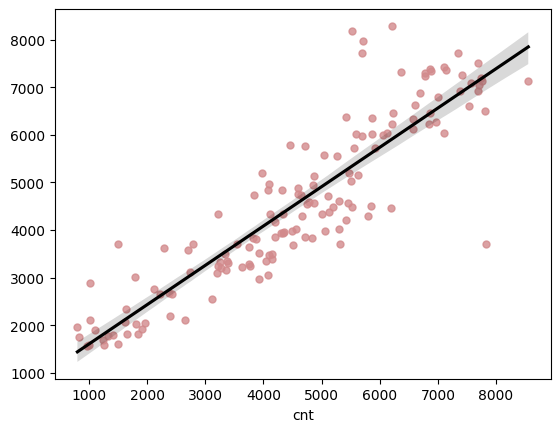

In [61]:
sns.regplot(x=y_test,y=y_pred,line_kws={'color' : 'black'},scatter_kws={'s' : 25,'color' : '#D28A8C'})

The alignment of the data points along the regression line indicates that the model performs well in predicting y_test values. The close proximity of points to the line suggests minimal error in predictions.

The overall tight clustering of points near the line implies that your regression model captures the relationship between the dependent and independent variables well.

The diagonal nature of the regression line (y = x) shows that as the actual values (y_test) increase, the predicted values (y_pred) also increase proportionally.

Need to perform residual diagnostics to understand how well the model generalizes. Look for patterns in residuals, as a random scatter suggests good performance.

In [62]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('cnt',axis=1),df.cnt,test_size=0.2,random_state=20)
x_train = sm.add_constant(x_train,prepend=False) # y = mx+c to consider c const column in the model
mod1 = sm.OLS(y_train,x_train).fit()  #ordinary least squared
print(mod1.summary())
# for x test 
x_test = sm.add_constant(x_test,prepend=False)
y_pred = mod1.predict(x_test)
print("Predicted:\n",y_pred.head()) # predicted
print("Actual:\n",y_test.head()) # actual

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     327.9
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          2.88e-196
Time:                        10:49:51   Log-Likelihood:                -4780.4
No. Observations:                 584   AIC:                             9577.
Df Residuals:                     576   BIC:                             9612.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp           114.8940      8.631     13.311   

<Figure size 1000x500 with 0 Axes>

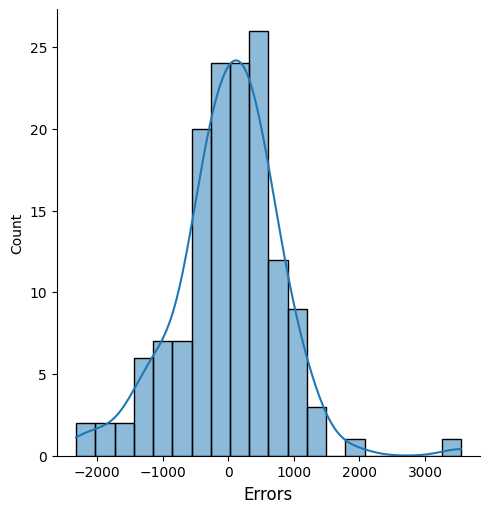

In [71]:
residuals = y_test - y_pred
fig = plt.figure(figsize = (10, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

In [76]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Conclusion

Bike demand is influenced is by features like season , year , weather situation affects count of total rental bikes including both casual and registered

Features such as season and year is strongly positive co-related beacuse when season and year increases count of total rental bikes including both casual and registered also increases


Features such as weather situation is strongly negative co-related because when the weather situation increases count of total rental bikes including both casual and registered

